In [1]:

import os
import sys
 
import cv2
import numpy as np

from matplotlib import pyplot as plt
import pandas as pd
from skimage.io import imshow, imread
import skimage

from aicsimageio import AICSImage
from aicspylibczi import CziFile
import czifile as zis

In [2]:
root = r'/Users/sz95789/Dropbox (Edison_Lab@UGA)/UGA PhD/image analysis/'
#workdir = root + r'workdir_test_image_preprocessing/'
img_dir = root+ r'test_images_four_exp/' #input: image directory
output_dir = root + r'output_test_image_preprocessing/'

os.makedirs(output_dir,exist_ok=True)

In [3]:
# read in czi file
img_file = os.path.join(img_dir,'E24W-1_C5_09.czi')

aicsfile = AICSImage(img_file)
#print(aicsfile.scenes)
#print(aicsfile.current_scene)
# AICSImage read the mosaic image as stitched; scenes can be accessed by set_scene;
# For RGB/BGR images, "S" dimension no longer represent "Scene" but "Samples" dimension (RGB / BGR) 

aicsfile.set_scene(17)
#print(aicsfile.current_scene)
print(aicsfile.dims)
#scene18, shp = img.read_image(S=18)
scene18 = aicsfile.get_image_data("YXS", T=0,C=0,Z=0) # numpy.ndarray
print(scene18.shape)

# print(type(scene18))


#print(scene18[5990:6000,10000:10099,1])
#print(scene18_tran[5990:6000,10000:10099,1])

# Using cv2.imshow() method to display the image
# window_name = 'image'

# window_name2 = 'image2'

# cv2.imshow(window_name, scene18)
# cv2.imshow(window_name2, scene18_tran)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1) # this is required for mac system




<Dimensions [T: 1, C: 1, Z: 1, Y: 9132, X: 16851, S: 3]>
(9132, 16851, 3)


In [6]:
# get CZI object and read array
czi = zis.CziFile(img_file)

# parse the XML into a dictionary
metadatadict_czi = czi.metadata(raw=False)

In [7]:
print(aicsfile.metadata  )
print(aicsfile.channel_names)  # returns a list of string channel names found in the metadata
print(czi.dtype) # determine pixel type for CZI array
print(metadatadict_czi['ImageDocument']['Metadata']['Information']['Image']['PixelType'])

print("PixelSize Y =",aicsfile.physical_pixel_sizes.Y)  # returns the Y dimension pixel size as found in the metadata
print("PixelSize X =",aicsfile.physical_pixel_sizes.X)  # returns the X dimension pixel size as found in the metadata



<Element 'ImageDocument' at 0x7f91cc634710>
['Bright']
uint8
Bgr24
PixelSize Y = 0.34675632076467305
PixelSize X = 0.34675632076467305


In [ ]:
#Gets the metadata.
with cz.CziFile(filepath_sample) as czi:
xml_metadata = czi.metadata()
#find timestamps (this is relevant only if you have a time series, but you don’t have one because the fourth axis in your .czi file is empty)
#for attachment in czi.attachments():
#if attachment.attachment_entry.name == ‘TimeStamps’:
#timestamps = attachment.data()
#break

#This gets the resolution of the image in microns.
root = ET.fromstring(xml_metadata)
for neighbor in root.iter(‘ScalingX’):
pixel_size_in_meters = neighbor.text
pixel_size_in_microns = float(pixel_size_in_meters)*1000000
resolution_x = 1/pixel_size_in_microns

In [29]:
# get metadata on 
# get CZI object and read array
czi = zis.CziFile(img_file)

# parse the XML into a dictionary
metadatadict_czi = czi.metadata(raw=False)

# determine pixel type for CZI array
print(czi.dtype)

# check if the CZI image is an RGB image depending on the last dimension entry of axes
print(czi.axes[-1])

# check CZI image pixel type
print(metadatadict_czi['ImageDocument']['Metadata']['Information']['Image']['PixelType'])

uint8
0
Bgr24


In [99]:
# convert from BGR to greyscale

gray = cv2.cvtColor(scene18, cv2.COLOR_BGR2GRAY)

window_name = 'org'

window_name2 = 'gray'

# Using cv2.imshow() method to display the image
cv2.imshow(window_name, scene18)
cv2.imshow(window_name2, gray)

cv2.waitKey(0)
cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)


-1

In [30]:
# increase the contrast of greyscale image using global equalization
glbequ = cv2.equalizeHist(gray)
res = np.hstack((gray,glbequ)) #stacking images side-by-side
cv2.imshow(window_name2, res)

cv2.waitKey(0)
cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)

-1

In [53]:
# increase contrast using adaptive equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32))
cl1 = clahe.apply(gray)
#res = np.hstack((gray,cl1)) #stacking images side-by-side
cv2.imshow(window_name2, cl1)

cv2.waitKey(0)
cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)

-1

In [7]:
print(scene18.shape)

(9132, 16851, 3)


In [15]:
# crop image to 8 tiles and subset bottom left
sub21 = scene18[4566:9133, 0:4214,:]
sub21.shape
window_name = 'org'
cv2.imshow(window_name, sub21)

cv2.waitKey(0)
cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)

-1

In [16]:
# view by color channels
# move tile 1500 pixels to the right of org image
sub21_rght = scene18[4566:9133, 1500:5714,:]
bgr_list = ["Blue", "Green", "Red"]
blue,green,red = cv2.split(sub21_rght)
cv2.imshow(window_name, sub21_rght)
cv2.imshow("Blue", blue)
cv2.imshow("Green", green)
cv2.imshow("Red", red)
cv2.waitKey(0)

cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)
#print(channel_statistics(img))


# red channel seems to be the best with high contrast between hyphae and background

-1

In [52]:
# increase contrast using adaptive equalization
# try clipLimit = range[1,60,5-10 steps], gridsize = range[8-64&256-1024]
cl1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32)) 
cl2 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(32,32)) # cliplimit=5, gridsize=32 is currently the best clip limit and tile grid size
redcl1 = cl1.apply(red)
redcl2 = cl2.apply(red)
res = np.hstack((redcl1,redcl2)) #stacking images side-by-side
cv2.imshow('red', res)

cv2.waitKey(0)
cv2.destroyAllWindows()   # closing all open windows
cv2.waitKey(1)

-1

In [ ]:
# try the CLACH on more images
# scene 04,06 of E24W-1_C5_11, and 18,26 of E24W-1_C5_09
for i in [17,25]:
    img_file = os.path.join(img_dir,'E24W-1_C5_09.czi')
    aicsfile = AICSImage(img_file)
    aicsfile.set_scene(i)
    scene = aicsfile.get_image_data("YXS", T=0,C=0,Z=0) # numpy.ndarray
    scene_dim = scene.shape
    #print(scene_dim)
    y = int(scene_dim[0]/2) #floor to closest to int
    x = int(scene_dim[1]/4)
    for a in range(0,2,1):
        for b in range(0,4,1):
            y_start = a*y
            y_end = (a+1)*y+1
            x_start = b*x
            x_end = (b+1)*x+1
            #print(y_start,y_end,x_start,x_end)
            tile = scene[y_start:y_end,x_start:x_end,:]
            tilename = "_".join(['E24W-1_C5_09_Scene', str(i+1),'Tile',str(a),str(b)])
            tilename = "".join([tilename,'.png'])
            cv2.imwrite(os.path.join(output_dir, tilename), tile)

In [ ]:
for i in [3,5]:
    img_file = os.path.join(img_dir,'E24W-1_C5_11.czi')
    aicsfile = AICSImage(img_file)
    aicsfile.set_scene(i)
    scene = aicsfile.get_image_data("YXS", T=0,C=0,Z=0) # numpy.ndarray
    scene_dim = scene.shape
    #print(scene_dim)
    y = int(scene_dim[0]/2) #floor to closest to int
    x = int(scene_dim[1]/4)
    for a in range(0,2,1):
        for b in range(0,4,1):
            y_start = a*y
            y_end = (a+1)*y+1
            x_start = b*x
            x_end = (b+1)*x+1
            #print(y_start,y_end,x_start,x_end)
            tile = scene[y_start:y_end,x_start:x_end,:]
            tilename = "_".join(['E24W-1_C5_11_Scene', str(i+1),'Tile',str(a),str(b)])
            tilename = "".join([tilename,'.png'])
            cv2.imwrite(os.path.join(output_dir, tilename), tile)
            

In [ ]:
image = cv2.imread(os.path.join(output_dir,imgfile))

In [27]:
cl1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32)) 
cl2 = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(32,32))
cl3 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(32,32))
subimg = []
for file in os.listdir(output_dir):
    if file.endswith(".png"):
        image = cv2.imread(os.path.join(output_dir,file),cv2.IMREAD_COLOR) #read as color image
        blue,green,red = cv2.split(image) #extract red channels
        channels = [blue, green, red]
        channel_names = ['blue','green','red']
        for i in range(0,3,1):
            filename = "_".join([file.replace('.png', ''), channel_names[i]])
            #subimg.append(channels[i])
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'.png'])), channels[i])
            imgcl1 = cl1.apply(channels[i])
            imgcl2 = cl2.apply(channels[i])
            imgcl3 = cl3.apply(channels[i])
            subimg.append([channels[i],imgcl1,imgcl2,imgcl3])
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip2.0_grid32.png'])), imgcl1)
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip3.5_grid32.png'])), imgcl2)
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip5.0_grid32.png'])), imgcl3)
        

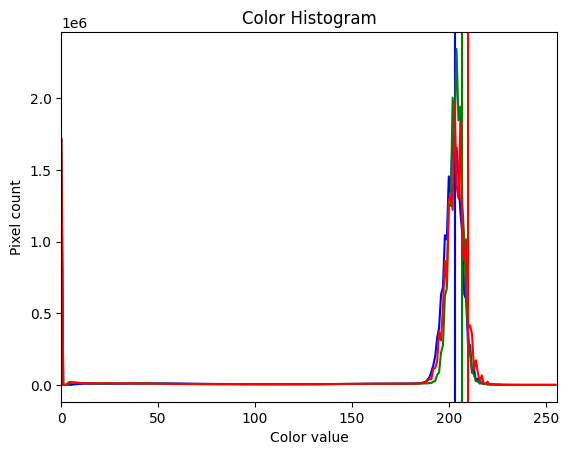

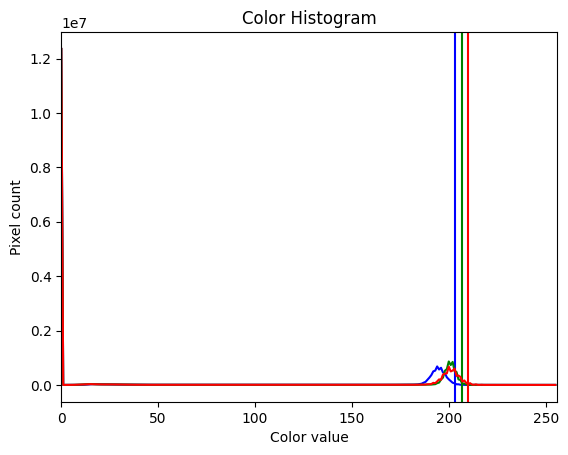

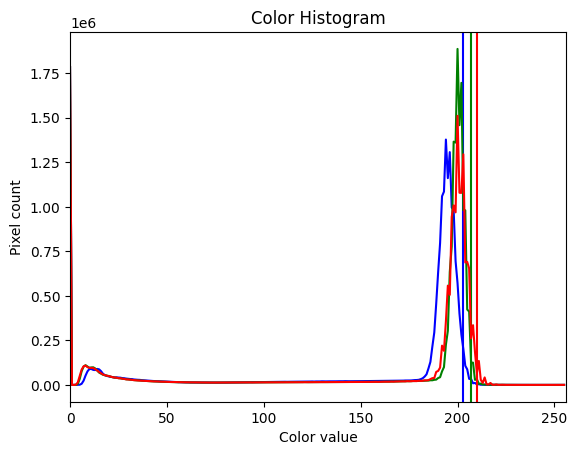

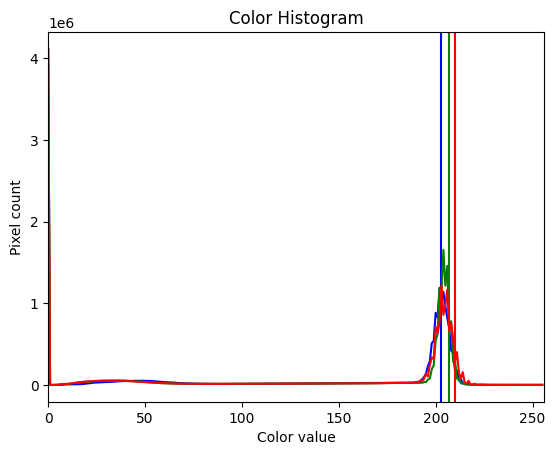

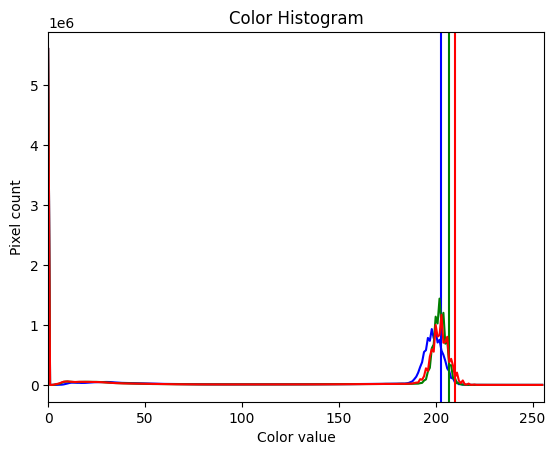

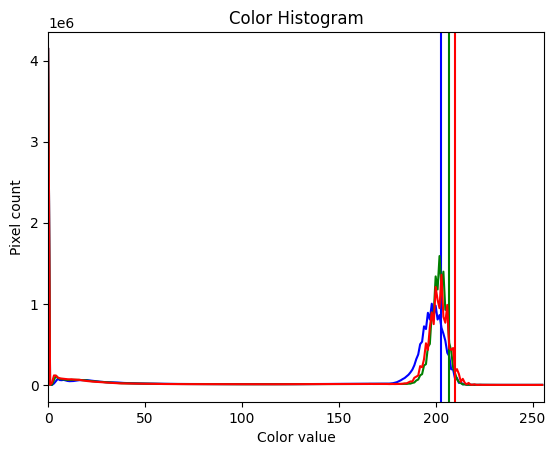

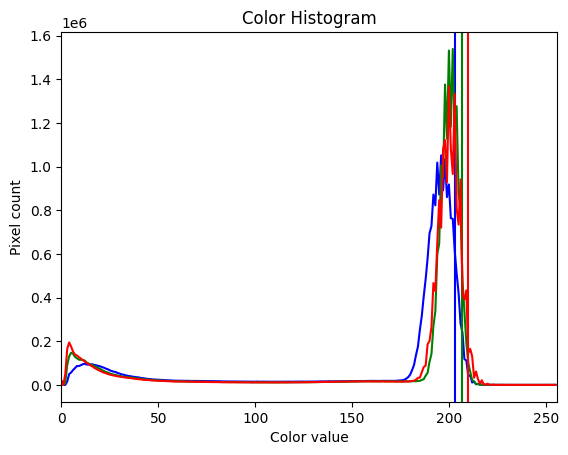

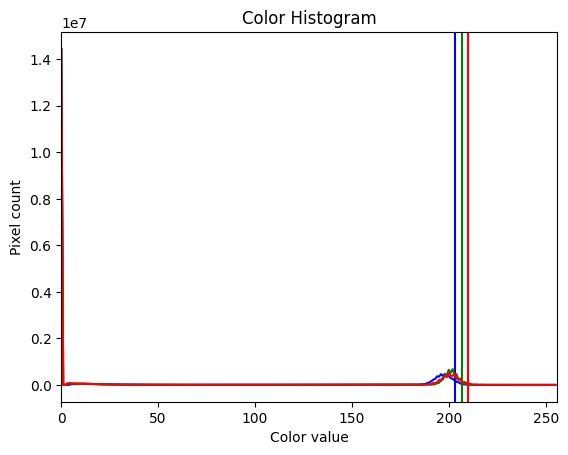

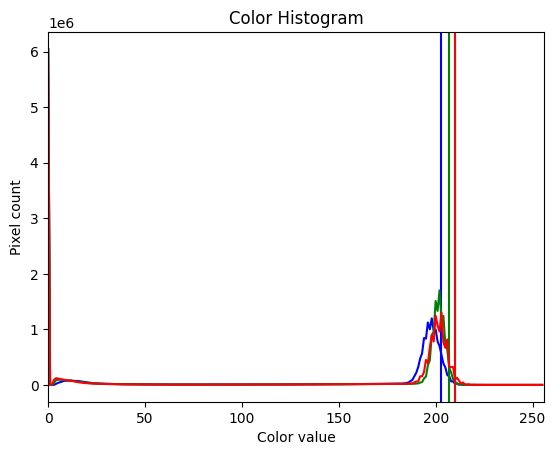

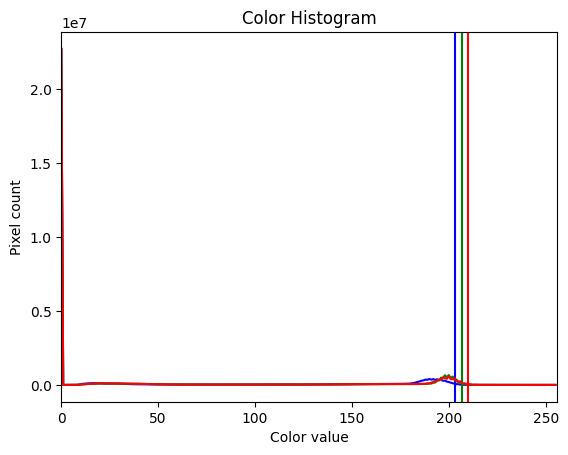

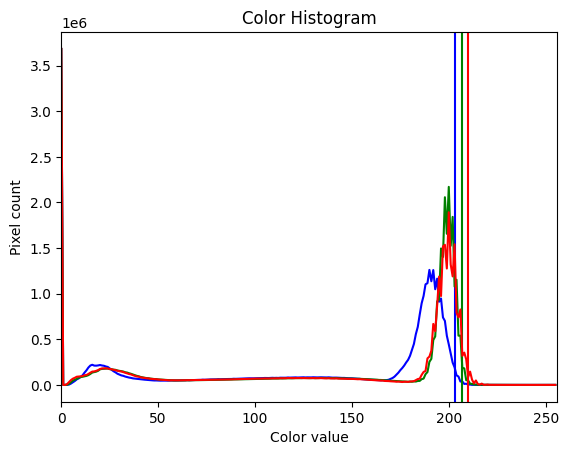

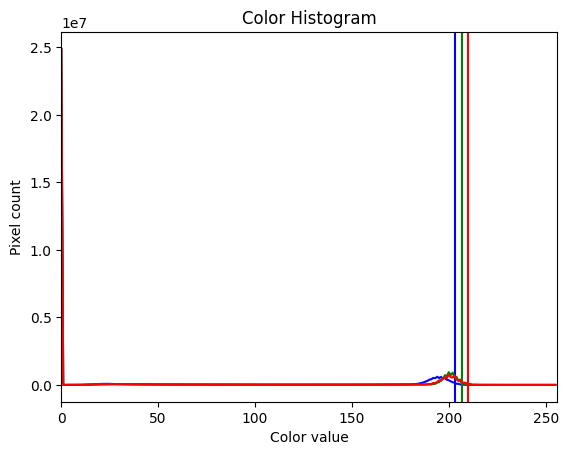

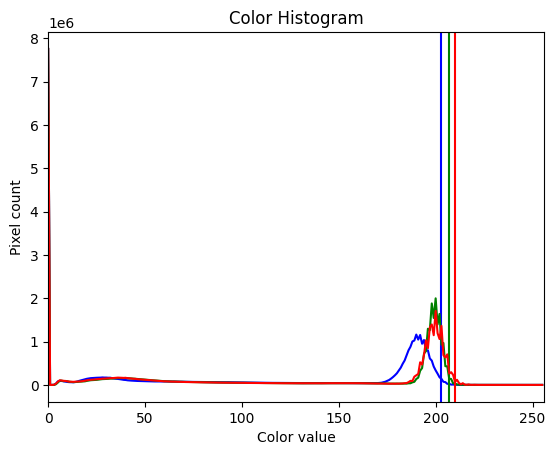

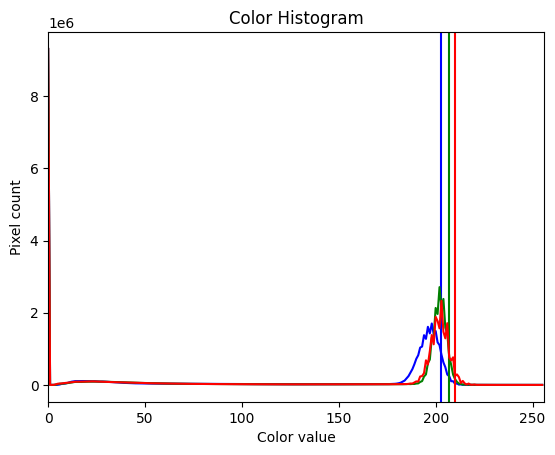

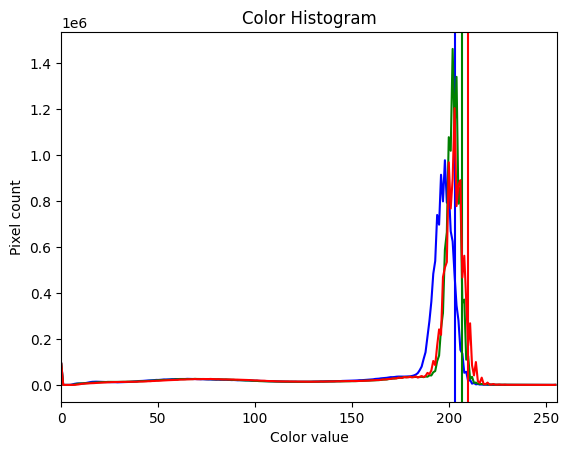

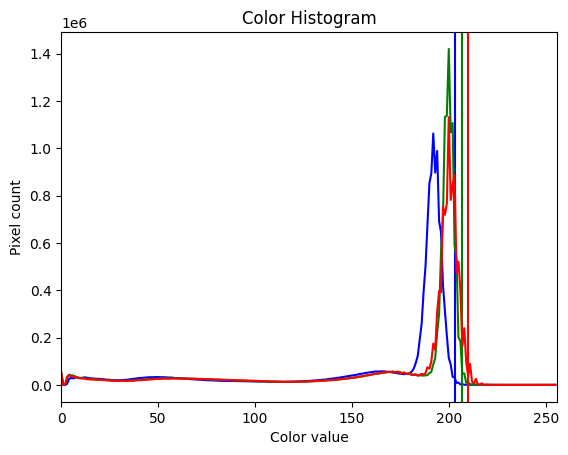

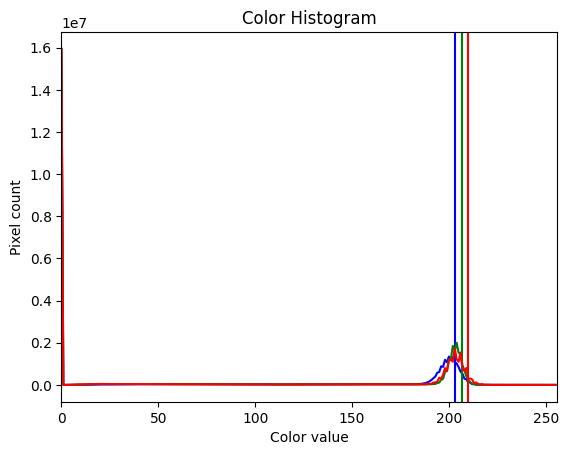

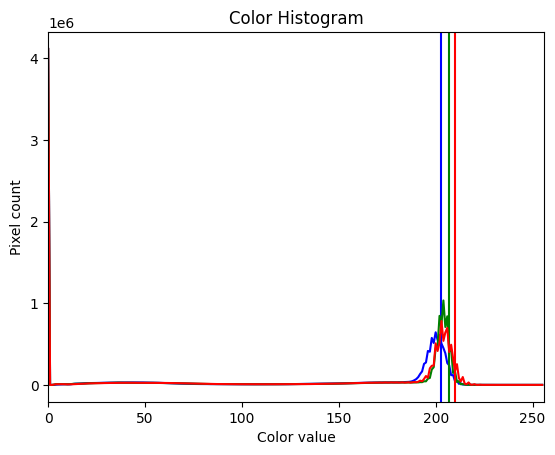

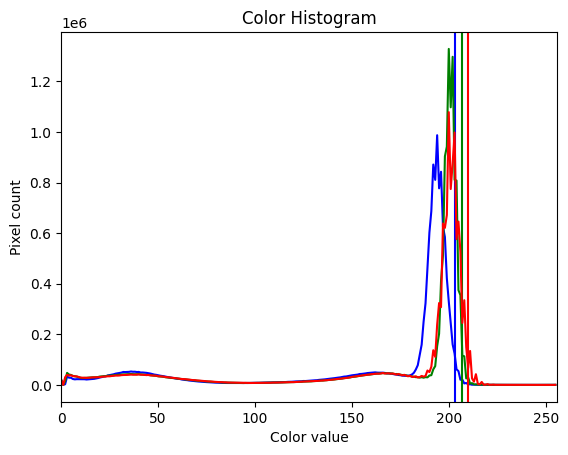

In [35]:
# plot color channel histogram
for file in os.listdir(output_dir):
    if file.endswith(".png"):
        image = cv2.imread(os.path.join(output_dir,file),cv2.IMREAD_COLOR) #read as color image
        channel_names = ['blue','green','red']
        plt.figure()
        plt.xlim([0, 256])
        for i in range(0,3,1):
            histogram, bin_edges = np.histogram(image[:, :, i], bins=256, range=(0, 256))
            plt.plot(bin_edges[0:-1], histogram, color=channel_names[i])
            plt.axvline(x = np.percentile(channels[i].ravel(), 98), color = channel_names[i])
        plt.title("Color Histogram")
        plt.xlabel("Color value")
        plt.ylabel("Pixel count")
        plt.show()

In [34]:
# print color histogram percentile 
record = []
for file in os.listdir(output_dir):
    if file.endswith(".png"):
        print(file)
        image = cv2.imread(os.path.join(output_dir,file),cv2.IMREAD_COLOR) #read as color image
        blue,green,red = cv2.split(image)
        channels = [blue, green, red]
        channel_names = ['blue','green','red']
        for i in range(0,3,1):
            print(channel_names[i])
            # percentile 
            print("90th percentile: ", np.percentile(channels[i].ravel(), 90))
            print("95th percentile: ", np.percentile(channels[i].ravel(), 95))
            print("98th percentile: ", np.percentile(channels[i].ravel(), 98))


E24W-1_C5_11_Scene_6_Tile_0_0.png
blue
90th percentile:  207.0
95th percentile:  209.0
98th percentile:  211.0
max: 255
green
90th percentile:  208.0
95th percentile:  209.0
98th percentile:  211.0
max: 255
red
90th percentile:  209.0
95th percentile:  211.0
98th percentile:  213.0
max: 255
E24W-1_C5_09_Scene_18_Tile_1_3.png
blue
90th percentile:  196.0
95th percentile:  198.0
98th percentile:  200.0
max: 255
green
90th percentile:  202.0
95th percentile:  204.0
98th percentile:  205.0
max: 255
red
90th percentile:  203.0
95th percentile:  205.0
98th percentile:  208.0
max: 255
E24W-1_C5_09_Scene_18_Tile_1_2.png
blue
90th percentile:  199.0
95th percentile:  201.0
98th percentile:  203.0
max: 255
green
90th percentile:  204.0
95th percentile:  205.0
98th percentile:  206.0
max: 255
red
90th percentile:  205.0
95th percentile:  207.0
98th percentile:  209.0
max: 255
E24W-1_C5_09_Scene_18_Tile_1_0.png
blue
90th percentile:  207.0
95th percentile:  208.0
98th percentile:  211.0
max: 255
g

In [ ]:
# based on the color histograms, red channel always seem to have the highest intensity, which may explains 
# for higher fungal hyphae resolution in red channel
# to normalize the image, I will use 98% percentile of red channel as max threshold

In [88]:
# https://emrecankuran.medium.com/a-guide-to-contrast-enhancement-transformation-functions-histogram-sliding-contrast-stretching-34149e5cdeed
# input image as np.array return image after contrast stretching as np.array
def contrast_stretch(r,newmax):
    a = 0
    b = 255
    c = 0
    d = newmax
    s = (r-c)*((b-a)/(d-c))+a  
    s[s > 255] = 255 #converting all pixels above 98 percentile to 255
    return np.array(s, dtype = np.uint8) # Specify the data type so that float value will be converted to int

In [92]:
# apply contrast stretch to original color image
for file in os.listdir(output_dir):
    if file.endswith(".png"):
        #print(file)
        image = cv2.imread(os.path.join(output_dir,file),cv2.IMREAD_COLOR) #read as color image
        blue,green,red = cv2.split(image)
        channels = [blue, green, red]
        channel_names = ['blue','green','red']
        newmax = np.percentile(red.ravel(),98)
        new_channels = []
        for i in range(0,3,1):
            csimg = contrast_stretch(channels[i],newmax)
            new_channels.append(csimg)
            #cv2.imwrite(os.path.join(output_dir, "_".join([file.replace('.png', ''),channel_names[i],'contrast_stretch.png'])), csimg)
        new_img = np.dstack((new_channels[0],new_channels[1],new_channels[2]))
        #print(new_img.shape)
        cv2.imwrite(os.path.join(output_dir, "_".join([file.replace('.png', ''),'contrast_stretch.png'])), new_img)
            

In [93]:
a = [1,2]
b=[2,3]
c=[3,4]
d = []
d.append([a,b,c])
print(d)

[[[1, 2], [2, 3], [3, 4]]]


In [ ]:
# apply CLAHE
cl1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(32,32)) 
cl2 = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(32,32))
cl3 = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(32,32))

for file in os.listdir(output_dir):
    if file.endswith("contrast_stretch.png"):
        image = cv2.imread(os.path.join(output_dir,file),cv2.IMREAD_COLOR) #read as color image
        blue,green,red = cv2.split(image) #extract red channels
        channels = [blue, green, red]
        channel_names = ['blue','green','red']
        sub_channels = []
        for i in range(0,3,1):
            filename = "_".join([file.replace('.png', ''), channel_names[i]])
            
            imgcl1 = cl1.apply(channels[i])
            imgcl2 = cl2.apply(channels[i])
            imgcl3 = cl3.apply(channels[i])
            
            sub_channels.append([imgcl1,imgcl2,imgcl3])
            
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip2.0_grid32.png'])), imgcl1)
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip3.5_grid32.png'])), imgcl2)
            #cv2.imwrite(os.path.join(output_dir, "".join([filename,'_CLAHE_clip5.0_grid32.png'])), imgcl3)
        #iterare over sub_channels to output bgr image after CLAHE
        cl_names = ['_CLAHE_clip2.0_grid32.png','_CLAHE_clip3.5_grid32.png','_CLAHE_clip5.0_grid32.png']
        for a in range(0,3,1):
            new_img = np.dstack((sub_channels[0][a],sub_channels[1][a],sub_channels[2][a]))
            #cv2.imwrite(os.path.join(output_dir, "".join([file.replace('.png', ''),cl_names[a]])), new_img)

In [ ]:
for i in range()
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(x, y)
axs[0, 0].set_title('Blue')
axs[0, 1].imshow(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].imshow(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].imshow(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

In [41]:
img.get_dims_shape()

[{'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 23),
  'S': (0, 1)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 13),
  'S': (1, 2)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 16),
  'S': (2, 3)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 20),
  'S': (3, 4)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 23),
  'S': (4, 5)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 16),
  'S': (5, 6)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 15),
  'S': (6, 7)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 21),
  'S': (7, 8)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 22),
  'S': (8, 9)},
 {'A': (0, 3),
  'X': (0, 2056),
  'Y': (0, 2464),
  'C': (0, 1),
  'M': (0, 16),
  'S': (9, 10)},
 {'A': (0, 3),
  'X

In [3]:
img_file = os.path.join(img_dir,'E24W-1_C5_09.czi')
czi = AICSImage(img_file)
for i in czi.scenes:
    czi.set_scene(i)
    print(i)
    print(czi.dims)
    img = czi.get_image_data("YXS", T=0,C=0,Z=0)
    #print(img.shape)
    print(img[:,:,0])
    #plt.figure().set_figwidth(10)
    #plt.imshow(img)

ScanRegion0
<Dimensions [T: 1, C: 1, Z: 1, Y: 6864, X: 20545, S: 3]>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
ScanRegion1
<Dimensions [T: 1, C: 1, Z: 1, Y: 6914, X: 16837, S: 3]>
[[  0   0   0 ... 215 210 210]
 [  0   0   0 ... 213 209 209]
 [  0   0   0 ... 210 211 210]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
ScanRegion2
<Dimensions [T: 1, C: 1, Z: 1, Y: 6914, X: 18719, S: 3]>
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [204 207 212 ...   0   0   0]
 [206 207 211 ...   0   0   0]
 [210 207 206 ...   0   0   0]]
ScanRegion3
<Dimensions [T: 1, C: 1, Z: 1, Y: 6921, X: 24253, S: 3]>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
ScanRegion4
<Dimensions [T: 1, C: 1, Z: 1, Y: 6921, X: 20551, S: 3]>
[[  0   0   0 ... 207 206 205]
